In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 数据已经加载
data = pd.read_excel('/Users/Ryan/Downloads/课程信息统计_sr-225459374.xlsx')

# 计算完成率和收藏率
data['完成率'] = data['完成人数'] / data['学习人数'] * 100
data['收藏率'] = data['收藏人数'] / data['学习人数'] * 100
data['评论率'] = data['课程评论数量'] / data['学习人数'] * 100

# 1. 定义"高质量"课程
median_learners = data['学习人数'].median()
data['is_high_quality'] = ((data['完成率'] > 75) & 
                           (data['学习人数'] > median_learners) & 
                           (data['综合评分'] == 5)).astype(int)

# 2. 准备特征和目标变量
features = ['学习人数', '完成率', '收藏率', '评论率', '笔记数量', '课程时长（分钟）']
X = data[features]
y = data['is_high_quality']

# 3. 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 特征缩放
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. 训练随机森林分类器
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# 6. 预测和评估
y_pred = rf_classifier.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# 7. 特征重要性
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('特征重要性')
plt.tight_layout()
plt.show()

# 8. 使用模型识别高质量课程
data['predicted_high_quality'] = rf_classifier.predict(scaler.transform(data[features]))

# 输出被预测为高质量的课程数量
print(f"预测为高质量的课程数量: {data['predicted_high_quality'].sum()}")

# 9. 查看部分高质量课程
high_quality_courses = data[data['predicted_high_quality'] == 1].sort_values('学习人数', ascending=False)
print(high_quality_courses[['课程名称', '学习人数', '完成率', '综合评分', '课程时长（分钟）']].head(10))

ValueError: Input X contains infinity or a value too large for dtype('float64').

NaN counts:
 学习人数           0
完成率         4283
收藏率         4283
评论率         4283
笔记数量           0
课程时长（分钟）       0
dtype: int64
Rows removed: 4283
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2407
           1       0.87      0.95      0.91       393

    accuracy                           0.97      2800
   macro avg       0.93      0.96      0.95      2800
weighted avg       0.97      0.97      0.97      2800

[[2350   57]
 [  19  374]]


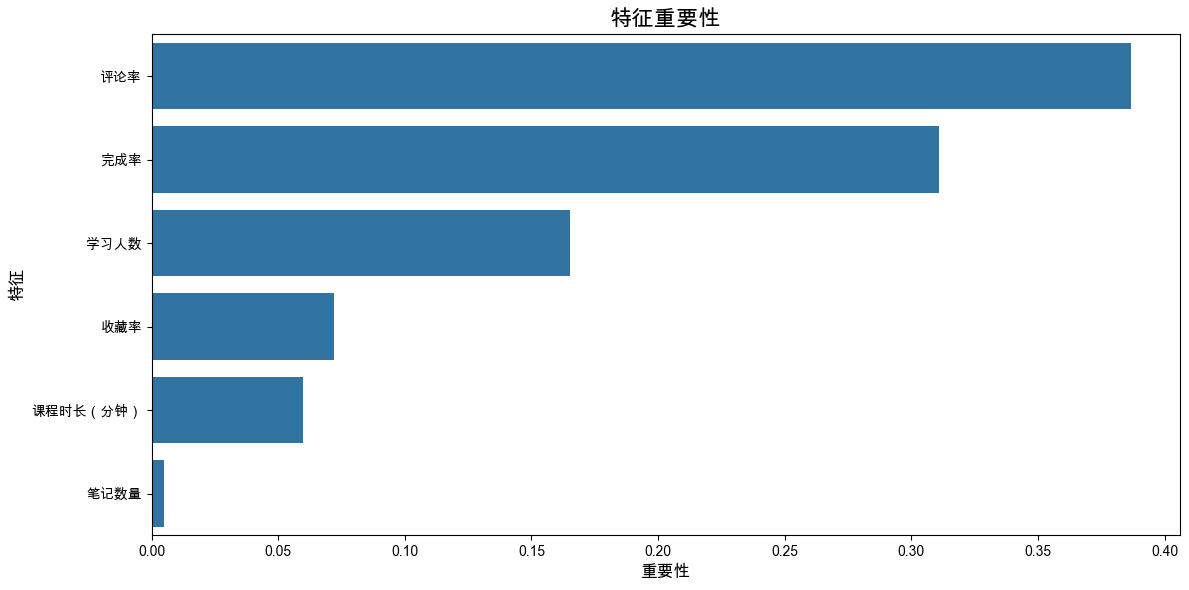

NaN counts:
 学习人数           0
完成率         4283
收藏率         4283
评论率         4283
笔记数量           0
课程时长（分钟）       0
dtype: int64
Rows removed: 4283
预测为高质量的课程数量: 2110.0
                        课程名称   学习人数        完成率  综合评分  课程时长（分钟）
15114           2023信息安全意识培训  38708  99.237884   5.0       4.0
14563       2024年度反舞弊及合规考试培训  30620  99.689745   NaN       6.0
12714          2022年信息安全培训考试  30130  98.413541   5.0       2.0
1402        2023年度反舞弊及合规考试培训  29592  98.922006   5.0       3.0
3231           2021年信息安全培训考试  22012  98.173723   5.0       2.0
2661            携程反舞弊与职业道德培训  19971  97.526413   5.0       3.0
2601        2022年度反舞弊及合规考试培训  18416  99.228931   5.0       2.0
14458      2021年携程反舞弊及合规考试培训  16548  98.652405   5.0       3.0
15511  【新员工】2024年度反舞弊及合规考试培训  15436  97.350350   5.0       3.0
13214      2019年携程反舞弊及合规考试培训  14955  98.635908   5.0       1.0


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 数据已经加载
data = pd.read_excel('/Users/Ryan/Downloads/课程信息统计_sr-225459374.xlsx')

# 计算完成率和收藏率
data['完成率'] = data['完成人数'] / data['学习人数'] * 100
data['收藏率'] = data['收藏人数'] / data['学习人数'] * 100
data['评论率'] = data['课程评论数量'] / data['学习人数'] * 100

# 1. 定义"高质量"课程
median_learners = data['学习人数'].median()
data['is_high_quality'] = ((data['完成率'] > 75) & 
                           (data['学习人数'] > median_learners) & 
                           (data['综合评分'] == 5)).astype(int)

# 2. 准备特征和目标变量
features = ['学习人数', '完成率', '收藏率', '评论率', '笔记数量', '课程时长（分钟）']
X = data[features]
y = data['is_high_quality']

# 检查并处理无穷大值和极端值
def clean_and_report(df):
    original_shape = df.shape
    
    # 替换无穷值为 NaN
    df = df.replace([np.inf, -np.inf], np.nan)
    
    # 报告每列的 NaN 数量
    nan_counts = df.isna().sum()
    print("NaN counts:\n", nan_counts)
    
    # 移除包含 NaN 的行
    df = df.dropna()
    
    # 报告被移除的行数
    rows_removed = original_shape[0] - df.shape[0]
    print(f"Rows removed: {rows_removed}")
    
    return df

X = clean_and_report(X)
y = y.loc[X.index]  # 确保 y 与 X 的索引匹配

# 3. 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 特征缩放
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. 训练随机森林分类器
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# 6. 预测和评估
y_pred = rf_classifier.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# 7. 特征重要性
import matplotlib.font_manager as fm
from matplotlib import rcParams

# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # 也可以尝试 'SimHei', 'Microsoft YaHei' 等
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('特征重要性', fontsize=16)
plt.xlabel('重要性', fontsize=12)
plt.ylabel('特征', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()
plt.show()

# 8. 使用模型识别高质量课程
data_cleaned = clean_and_report(data[features])
data_scaled = scaler.transform(data_cleaned)
data.loc[data_cleaned.index, 'predicted_high_quality'] = rf_classifier.predict(data_scaled)

# 输出被预测为高质量的课程数量
print(f"预测为高质量的课程数量: {data['predicted_high_quality'].sum()}")

# 9. 查看部分高质量课程
high_quality_courses = data[data['predicted_high_quality'] == 1].sort_values('学习人数', ascending=False)
print(high_quality_courses[['课程名称', '学习人数', '完成率', '综合评分', '课程时长（分钟）']].head(10))